In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Preprocess the data**

In [4]:
# Load Dtaset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Encode Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [5]:
# transformation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

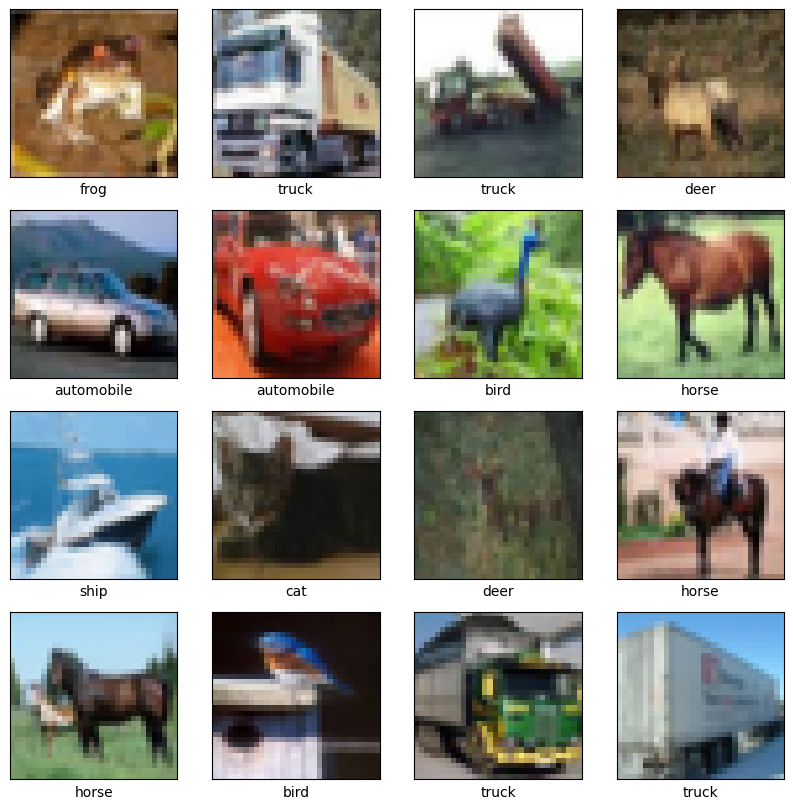

In [6]:
# Visualize so samples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Resize images
def resize_images(images):
    return tf.image.resize(images, (64, 64))

x_train = resize_images(x_train)
x_test = resize_images(x_test)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)
datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=64)

# Load MobileNetV2 as base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

# Define model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    validation_data=(x_test, y_test),
    epochs=15,
    verbose=1,
    callbacks=[early_stopping]
)

# Fine-tune
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_generator,
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {test_acc:.4f}')


<ipython-input-8-350fec7285b2>:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.4828 - loss: 1.5009 - val_accuracy: 0.6417 - val_loss: 1.0200
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6146 - loss: 1.1100 - val_accuracy: 0.6578 - val_loss: 0.9833
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6261 - loss: 1.0637 - val_accuracy: 0.6606 - val_loss: 0.9606
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.6383 - loss: 1.0249 - val_accuracy: 0.6702 - val_loss: 0.9496
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6437 - loss: 1.0086 - val_accuracy: 0.6708 - val_loss: 0.9395
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6506 - loss: 0.9873 - val_accuracy: 0.6698 - val_loss: 0.9445
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6608 - loss: 0.9645 - val_accuracy: 0.6701 - val_loss: 0.9381
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6629 - loss: 0.9573 - val_accurac

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Generate predictions for the test set

In [10]:
# Predict the labels for test images
y_pred_probs = model.predict(x_test)  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Get true labels



313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

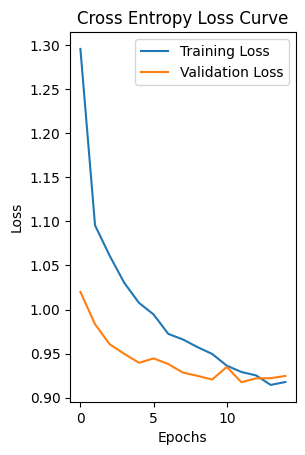

In [12]:
# loose curve
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()


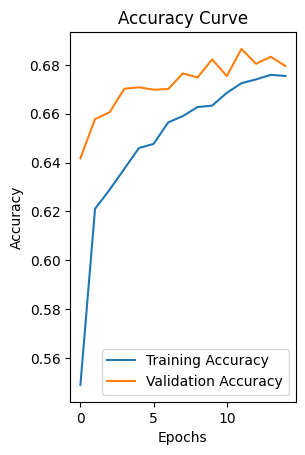

In [13]:
# accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()


In [14]:
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      1000
           1       0.92      0.94      0.93      1000
           2       0.85      0.84      0.85      1000
           3       0.84      0.67      0.75      1000
           4       0.83      0.87      0.85      1000
           5       0.77      0.83      0.80      1000
           6       0.82      0.96      0.89      1000
           7       0.90      0.90      0.90      1000
           8       0.91      0.95      0.93      1000
           9       0.91      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [15]:
model.save('MobileNetV2.model.h5')

test loose , test accuarcy

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {:.4f}".format(test_loss))
print("Test Accuracy: {:.4f}".format(test_accuracy))

Test Loss: 0.3991
Test Accuracy: 0.8688


Accuracy, Precision, Recall -F1 score

In [17]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Accuracy: 0.8688
Precision: 0.8707
Recall: 0.8688
F1 Score: 0.8675


Train

In [19]:
from tensorflow.keras.callbacks import *

In [20]:
checkpoint = ModelCheckpoint(
    filepath='best_model.weights.h5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

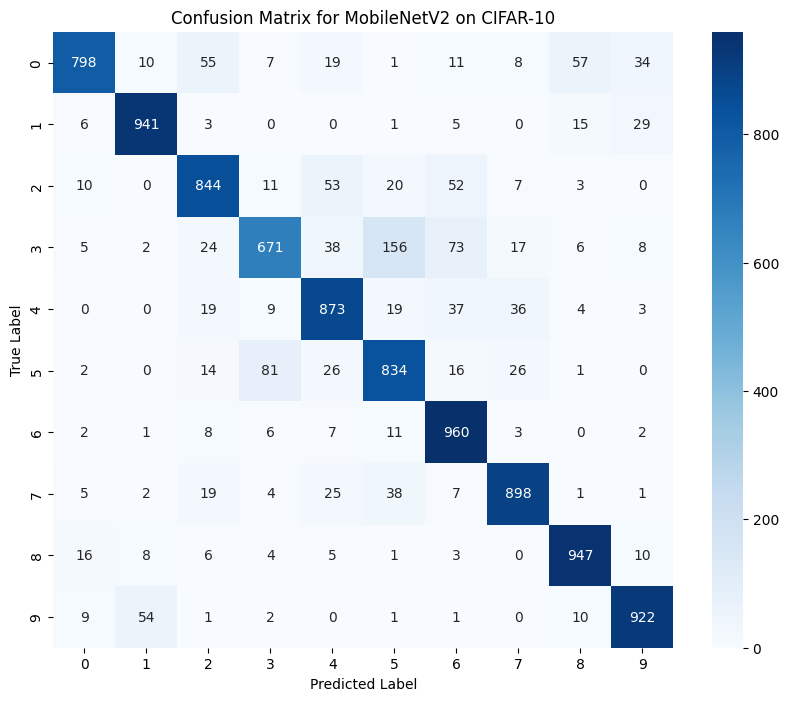

In [21]:
#Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MobileNetV2 on CIFAR-10")
plt.show()

